In [6]:
import numpy as np
import random

In [28]:
def self_avoiding_random_walk(steps, grid_size):
    MOVES = np.array([(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)])
    visited = set()
    pos = (0, 0, 0)
    walk = [pos]

    for i in range(steps):
        move = random.choice(MOVES)
        new_pos = tuple(x + y for x, y in zip(pos, move))

        if any(abs(coord) > grid_size for coord in new_pos):
            continue

        if new_pos in visited:
            continue
        visited.add(new_pos)
        pos = new_pos
        walk.append(pos)
    return walk

In [43]:
def get_coords(walk):
    x = [pos[0] for pos in walk]
    y = [pos[1] for pos in walk]
    z = [pos[2] for pos in walk]
    return x, y, z

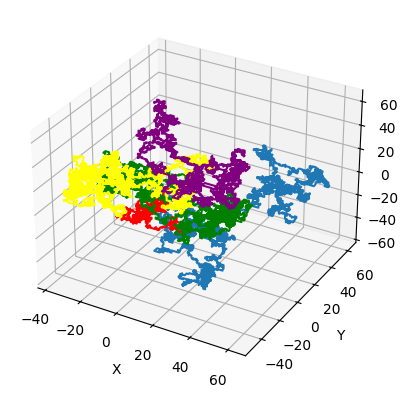

In [133]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 5000
grid_size = 500

walk = self_avoiding_random_walk(n, grid_size)
walk2 = self_avoiding_random_walk(n, grid_size)
walk3 = self_avoiding_random_walk(n, grid_size)
walk4 = self_avoiding_random_walk(n, grid_size)
walk5 = self_avoiding_random_walk(n, grid_size)

x, y, z = get_coords(walk)
x2, y2, z2 = get_coords(walk2)
x3, y3, z3 = get_coords(walk3)
x4, y4, z4 = get_coords(walk4)
x5, y5, z5 = get_coords(walk5)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.plot(x2, y2, z2, color='red')  
ax.plot(x3, y3, z3, color='green') 
ax.plot(x4, y4, z4, color='yellow')
ax.plot(x5, y5, z5, color='purple')    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [134]:
import plotly.graph_objects as go

# Tworzenie wykresu
fig = go.Figure()

# Dodawanie spacerów do wykresu
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', name='walk1'))
fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2, mode='lines', name='walk2', line=dict(color='red')))
fig.add_trace(go.Scatter3d(x=x3, y=y3, z=z3, mode='lines', name='walk3', line=dict(color='green')))
fig.add_trace(go.Scatter3d(x=x4, y=y4, z=z4, mode='lines', name='walk4', line=dict(color='yellow')))
fig.add_trace(go.Scatter3d(x=x5, y=y5, z=z5, mode='lines', name='walk5', line=dict(color='purple')))

# Ustawienie tytułów osi
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Wyświetlenie wykresu
fig.show()